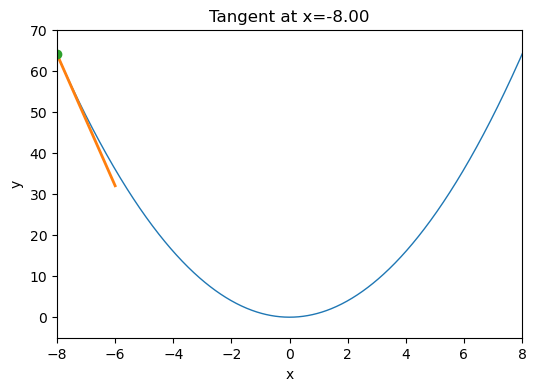

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# (1) Your existing function, refactored to draw on a given Axes
def plot_derivative_at_point(ax, function, point,
                             derivative=None,
                             min_x=-10, max_x=10):
    """
    Plots the function in [min_x, max_x] and its tangent at `point` onto Axes `ax`.
    """
    # sample the curve
    x = np.linspace(min_x, max_x, 1000)
    y = function(x)
    ax.plot(x, y, lw=1)

    # slope at point
    if derivative is None:
        m = calculate_derivative_at_point(function, point)
    else:
        m = derivative(point)

    # tangent line segment
    intercept = function(point) - m * point
    xt = np.linspace(point - 2, point + 2, 10)
    yt = m * xt + intercept
    ax.plot(xt, yt, lw=2)

    # draw a dot at the point
    ax.plot(point, function(point), 'o')

# (2) define f and its derivative
def f(x):
    return x**2

def df(x):
    return 2*x

# (3) set up the figure once
fig, ax = plt.subplots(figsize=(6,4))
ax.set_xlim(-8, 8)
ax.set_ylim(-5, 70)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Moving Tangent on y=x²')

# (4) animation update
def update(x0):
    ax.clear()  # wipe previous frame
    ax.set_xlim(-8, 8)
    ax.set_ylim(-5, 70)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Tangent at x={:.2f}'.format(x0))

    plot_derivative_at_point(ax, f, x0, derivative=df)

# (5) create the animation
x_frames = np.linspace(-8, 8, 200)
ani = FuncAnimation(fig, update, frames=x_frames,
                    interval=50, blit=False, repeat=True)

# (6) display inline in Jupyter
HTML(ani.to_jshtml())